In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

# Dataset 1: VEH0270

**Data Preparation and Cleaning**

In [ ]:
vehicle_sales = pd.read_csv('/content/drive/MyDrive/df_VEH0270.csv')

In [ ]:
vehicle_sales.head()

,BodyType,Make,GenModel,Model,Fuel,EngineSizeSimple,EngineSizeDesc,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,1400,1301cc to 1400cc,0,0,0,0,0,8,12,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,1400,1301cc to 1400cc,0,0,0,0,0,14,15,0,0,0
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,1400,1301cc to 1400cc,0,1,0,0,0,35,542,358,159,0
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,1400,1301cc to 1400cc,0,0,0,0,0,207,402,91,36,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,1400,1301cc to 1400cc,0,0,0,0,0,0,2,63,0,0


**Filtering by Fuel Type**

In [ ]:
fuel_petrol = vehicle_sales[vehicle_sales['Fuel'] == 'Petrol']

In [ ]:
fuel_electric = vehicle_sales[vehicle_sales['Fuel'] == 'Battery electric']

In [ ]:
year_columns = ['2024', '2023', '2022', '2021', '2020', '2019']

In [ ]:
fuel_yearly_petrol = []
for year in year_columns:
  total = fuel_petrol[year].sum()
  fuel_yearly_petrol.append({'Year': int(year),'Petrol_Registration': total})
  print(f"\nTotal Petrol Registration in {year}: {total}")


Total Petrol Registration in 2024: 886246

Total Petrol Registration in 2023: 1032071

Total Petrol Registration in 2022: 955336

Total Petrol Registration in 2021: 1046662

Total Petrol Registration in 2020: 1133660

Total Petrol Registration in 2019: 1672881


In [ ]:
fuel_yearly_electric = []
for year in year_columns:
  total_electric = fuel_electric[year].sum()
  fuel_yearly_electric.append({'Year': int(year),'Electric_Registration': total_electric})
  print(f"\nTotal Electric Registration in {year}: {total_electric}")


Total Electric Registration in 2024: 426312

Total Electric Registration in 2023: 355464

Total Electric Registration in 2022: 305937

Total Electric Registration in 2021: 218895

Total Electric Registration in 2020: 125565

Total Electric Registration in 2019: 57578


**Merge Petrol and EV sales**

In [ ]:
petrol_df = pd.DataFrame(fuel_yearly_petrol)
electric_df = pd.DataFrame(fuel_yearly_electric)

sales_yearly = pd.merge(petrol_df, electric_df, on='Year')
print(sales_yearly)

   Year  Petrol_Registration  Electric_Registration
0  2024               886246                 426312
1  2023              1032071                 355464
2  2022               955336                 305937
3  2021              1046662                 218895
4  2020              1133660                 125565
5  2019              1672881                  57578


# Dataset 2: Chargers Data

**Data Preparation and Cleaning**

In [ ]:
chargers = pd.read_csv('/content/drive/MyDrive/electric-vehicle-public-charging-infrastructure-statistics-july-2025.csv', skiprows=2)

In [ ]:
chargers.head()

,Local authority / region code,Local authority / region name,Oct-19,Jan-20,Apr-20,Jul-20,Oct-20,Jan-21,Apr-21,Jul-21,...,Jul-24,Oct-24 [Note 14],Jan-25,Apr-25,Jul-25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,K02000001,United Kingdom,"15,116","16,505","17,947","18,265","19,487","20,775","22,790","24,374",...,"64,632","70,042","73,334","76,507","82,002",NaN,NaN,NaN,NaN,NaN
1,K03000001,Great Britain,"14,821","16,210","17,642","17,953","19,169","20,455","22,463","24,044",...,"64,014","69,403","72,654","75,835","81,318",NaN,NaN,NaN,NaN,NaN
2,E92000001,England,"12,549","13,719","14,979","15,395","16,456","17,459","19,261","20,563",...,"55,631","60,364","63,389","65,877","70,672",NaN,NaN,NaN,NaN,NaN
3,E12000001,North East,738,752,786,812,849,820,854,887,...,"1,919","2,295","2,583","2,553","2,703",NaN,NaN,NaN,NaN,NaN
4,E06000047,County Durham,92,96,102,105,106,110,121,116,...,313,359,400,462,482,NaN,NaN,NaN,NaN,NaN


In [ ]:
uk_chargers = chargers[chargers['Local authority / region name']=='United Kingdom'].iloc[0]

In [ ]:
date_columns = ['Oct-19', 'Jan-20', 'Apr-20', 'Jul-20', 'Oct-20', 'Jan-21', 'Apr-21', 'Jul-21', 'Oct-21', 'Jan-22', 'Apr-22', 'Jul-22', 'Oct-22', 'Jan-23', 'Apr-23', 'Jul-23', 'Oct-23', 'Jan-24', 'Apr-24', 'Jul-24', 'Oct-24', 'Jan-25', 'Apr-25', 'Jul-25']

In [ ]:
dates = []
charger_counts = []
for index, value in uk_chargers.items():
    if '-' in str(index) and index not in ['Local authority / region code', 'Local authority / region name']:
        dates.append(str(index).replace(' [Note 14]', ''))
        charger_counts.append(int(str(value).replace(',', '')))
charger_clean = pd.DataFrame({'Date': dates, 'Charger_Count': charger_counts})
charger_clean['Date'] = pd.to_datetime(charger_clean['Date'], format='%b-%y')
charger_clean['Year'] = charger_clean['Date'].dt.year
print(charger_clean)

         Date  Charger_Count  Year
0  2019-10-01          15116  2019
1  2020-01-01          16505  2020
2  2020-04-01          17947  2020
3  2020-07-01          18265  2020
4  2020-10-01          19487  2020
5  2021-01-01          20775  2021
6  2021-04-01          22790  2021
7  2021-07-01          24374  2021
8  2021-10-01          25927  2021
9  2022-01-01          28375  2022
10 2022-04-01          30290  2022
11 2022-07-01          32011  2022
12 2022-10-01          34637  2022
13 2023-01-01          37055  2023
14 2023-04-01          40150  2023
15 2023-07-01          44020  2023
16 2023-10-01          49220  2023
17 2024-01-01          53677  2024
18 2024-04-01          59670  2024
19 2024-07-01          64632  2024
20 2024-10-01          70042  2024
21 2025-01-01          73334  2025
22 2025-04-01          76507  2025
23 2025-07-01          82002  2025


In [ ]:
charger_yearly = charger_clean.groupby('Year')['Charger_Count'].sum().reset_index()
print(charger_yearly)

   Year  Charger_Count
0  2019          15116
1  2020          72204
2  2021          93866
3  2022         125313
4  2023         170445
5  2024         248021
6  2025         231843


**Tansformation and Merging Data**

In [ ]:
combined_data = pd.merge(sales_yearly, charger_yearly, on='Year', how='inner')
print(combined_data.head())

   Year  Petrol_Registration  Electric_Registration  Charger_Count
0  2024               886246                 426312         248021
1  2023              1032071                 355464         170445
2  2022               955336                 305937         125313
3  2021              1046662                 218895          93866
4  2020              1133660                 125565          72204


**Extra Steps for changing 1.6 millions into 1.6M**

In [ ]:
def format_numbers(value, pos):
  if value >=1e6:
    return f'{value / 1e6:.1f}M'
  elif value >= 1e3:
      return f'{value / 1e3:.1f}K'
  else:
      return f'{value:.0f}'

**Keep the graph format same**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(format_numbers)
font1 = {'family':'serif', 'color': 'blue', 'size': 20}
font2 = {'family':'serif', 'color': 'darkred', 'size': 15}

# Univariate Analysis

In [ ]:
combined_data['Petrol_Registration'].describe()

,Petrol_Registration
count,6.000000e+00
mean,1.121143e+06
std,2.830976e+05
min,8.862460e+05
25%,9.745198e+05
50%,1.039366e+06
75%,1.111910e+06
max,1.672881e+06


In [ ]:
combined_data['Electric_Registration'].describe()

,Electric_Registration
count,6.000000
mean,248291.833333
std,140568.726211
min,57578.000000
25%,148897.500000
50%,262416.000000
75%,343082.250000
max,426312.000000


In [ ]:
combined_data['Charger_Count'].describe()

,Charger_Count
count,6.000000
mean,120827.500000
std,81149.603727
min,15116.000000
25%,77619.500000
50%,109589.500000
75%,159162.000000
max,248021.000000


**Time Series**

**Petrol Vs EV Registration**

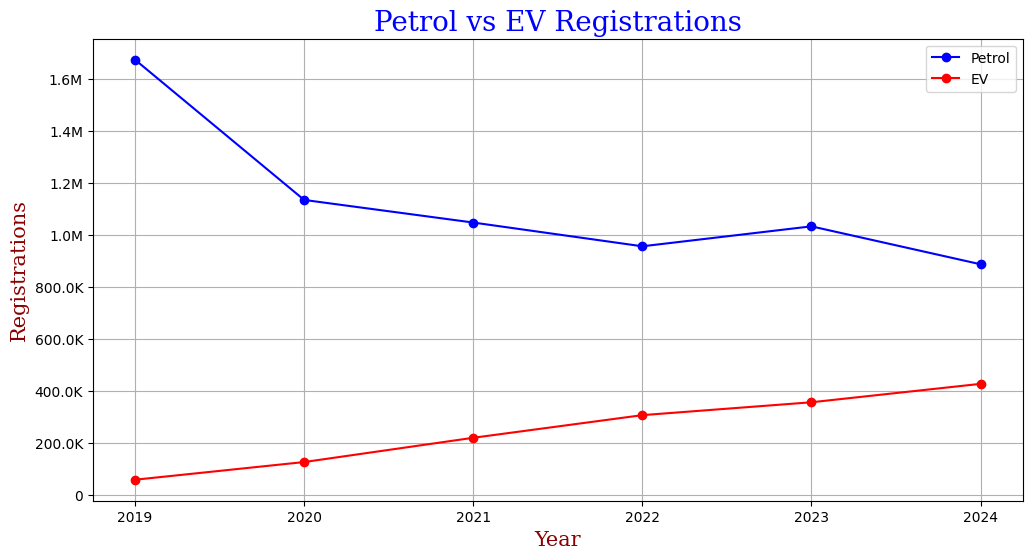

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(combined_data['Year'], combined_data['Petrol_Registration'], marker='o', linestyle='-', color='blue', label='Petrol')
plt.plot(combined_data['Year'], combined_data['Electric_Registration'], marker='o', linestyle='-', color='red', label='EV')
plt.title("Petrol vs EV Registrations", fontdict=font1)
plt.xlabel("Year", fontdict=font2)
plt.ylabel("Registrations", fontdict=font2)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

**Public Chargers**

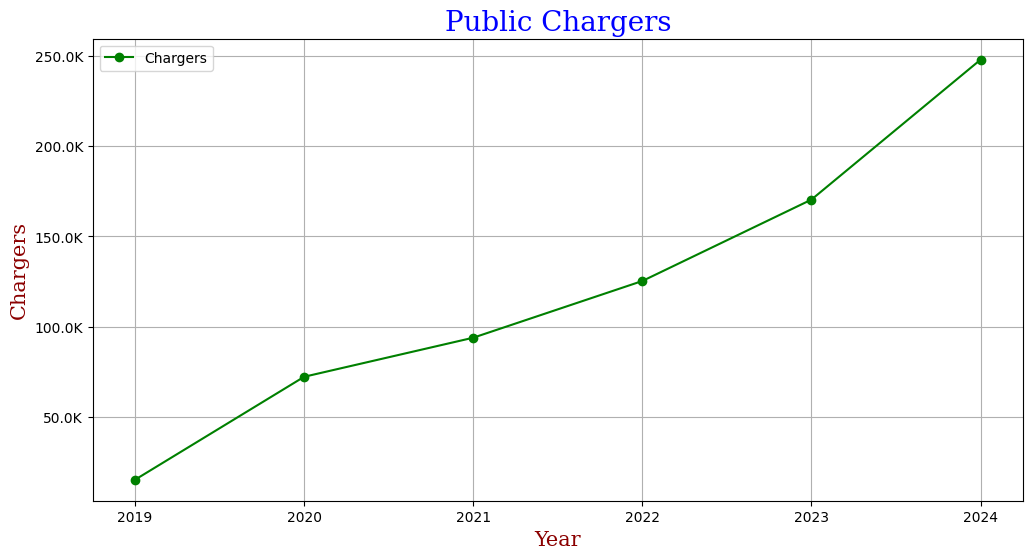

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(combined_data['Year'], combined_data['Charger_Count'], marker='o', linestyle='-', color='green', label='Chargers')
plt.title("Public Chargers", fontdict=font1)
plt.xlabel("Year", fontdict=font2)
plt.ylabel("Chargers", fontdict=font2)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


**EV Vs Charger Registration**

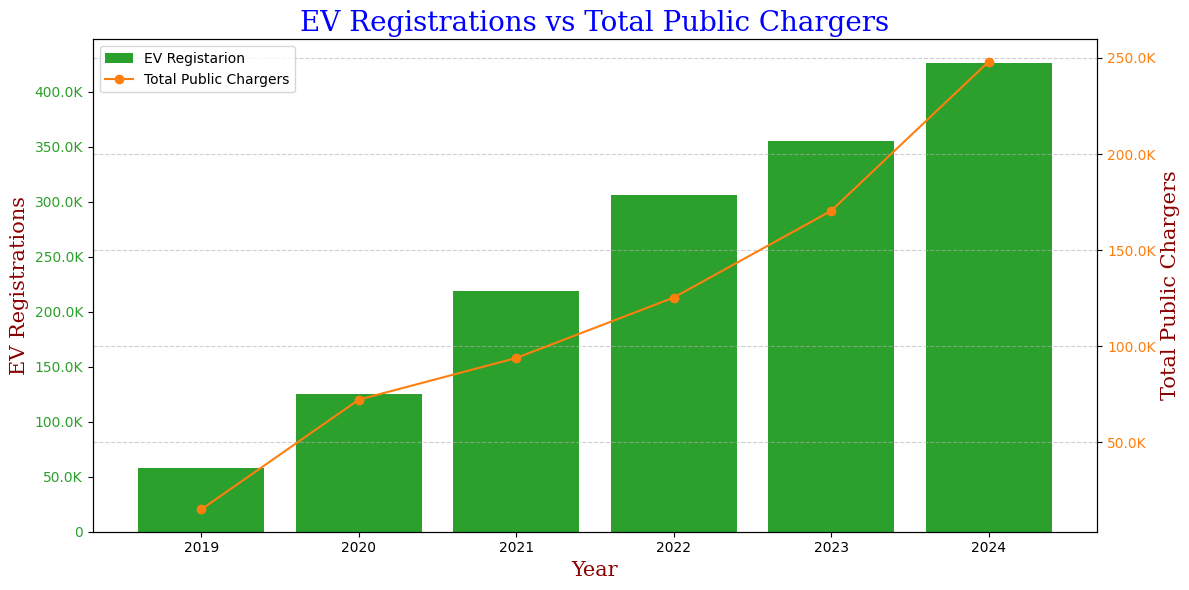

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(combined_data['Year'], combined_data['Electric_Registration'], color='#2ca02c', label='EV Registarion')
ax1.set_xlabel('Year', fontdict=font2)
ax1.set_ylabel('EV Registrations', fontdict=font2)
ax1.tick_params(axis='y', labelcolor='#2ca02c')
ax1.yaxis.set_major_formatter(formatter)

ax2 = ax1.twinx()
ax2.plot(combined_data['Year'], combined_data['Charger_Count'], color='#ff7f0e', marker='o', linestyle='-', label='Total Public Chargers')
ax2.set_ylabel('Total Public Chargers', fontdict=font2)
ax2.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.yaxis.set_major_formatter(formatter)

plt.title("EV Registrations vs Total Public Chargers", fontdict=font1)
fig.tight_layout()
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Multivariate Analysis

**Petrol Vs Electric Vehicle**

In [ ]:
correlation = combined_data[['Petrol_Registration', 'Electric_Registration']].corr()
print(correlation)

                       Petrol_Registration  Electric_Registration
Petrol_Registration               1.000000              -0.831725
Electric_Registration            -0.831725               1.000000


In [ ]:
X = combined_data[['Petrol_Registration']]
y = combined_data['Electric_Registration']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: 711304.879121655
Slope: -0.41298316401152785


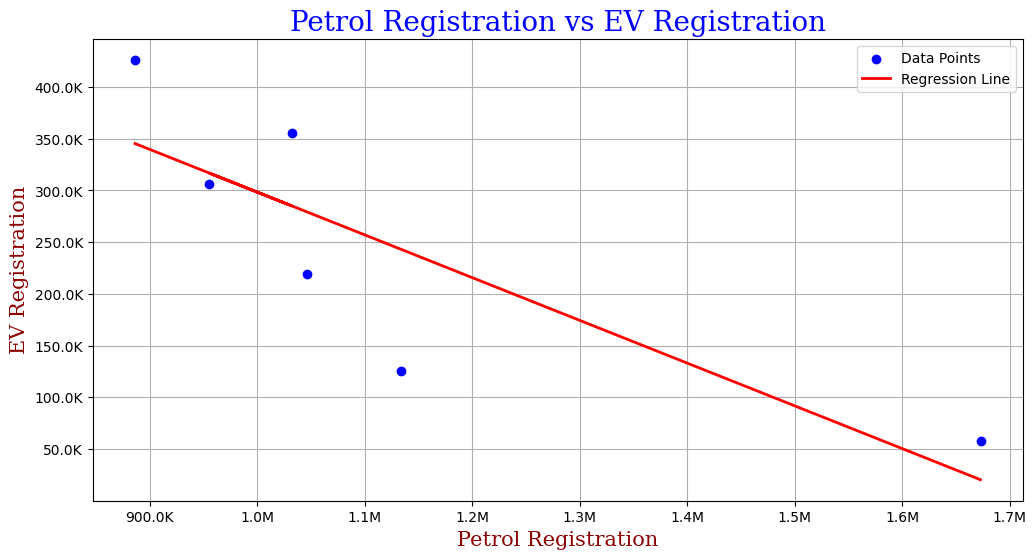

In [ ]:
X = combined_data[['Petrol_Registration']]
y = combined_data['Electric_Registration']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title("Petrol Registration vs EV Registration", fontdict=font1)
plt.xlabel("Petrol Registration", fontdict=font2)
plt.ylabel("EV Registration", fontdict=font2)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

**EV Vs Charging stations**

In [ ]:
correlation = combined_data[['Electric_Registration', 'Charger_Count']].corr()
print(correlation)

                       Electric_Registration  Charger_Count
Electric_Registration               1.000000       0.966764
Charger_Count                       0.966764       1.000000


In [ ]:
X_ch = combined_data[['Charger_Count']]
y_ch = combined_data['Electric_Registration']
model = LinearRegression()
model.fit(X_ch, y_ch)

LinearRegression()

In [ ]:
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: 45948.74433127517
Slope: 1.6746443400886237


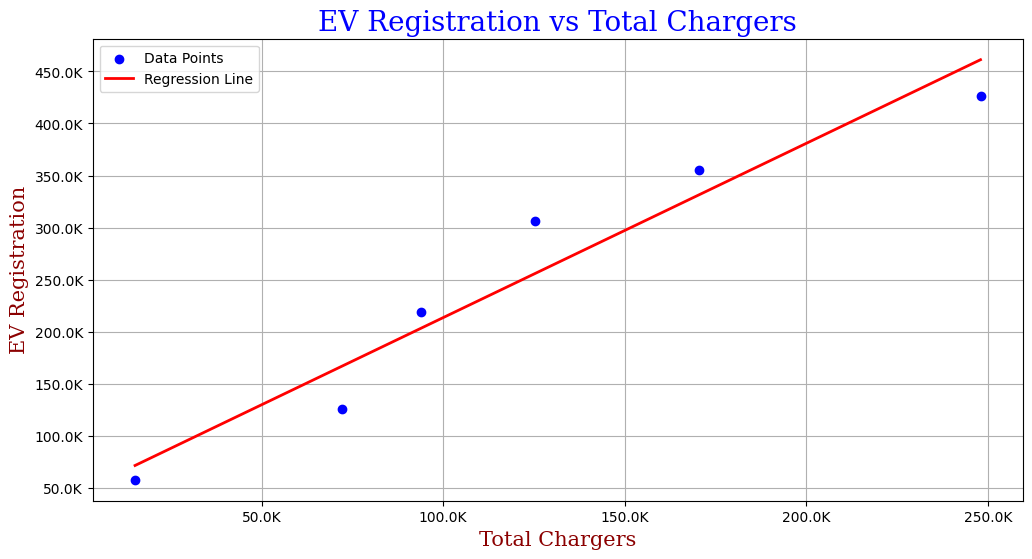

In [ ]:
X_ch = combined_data[['Charger_Count']]
y_ch = combined_data['Electric_Registration']
model = LinearRegression()
model.fit(X_ch, y_ch)

plt.figure(figsize=(12,6))
plt.scatter(X_ch, y_ch, color='blue', label='Data Points')
plt.plot(X_ch, model.predict(X_ch), color='red', linewidth=2, label='Regression Line')
plt.title("EV Registration vs Total Chargers", fontdict=font1)
plt.xlabel("Total Chargers", fontdict=font2)
plt.ylabel("EV Registration", fontdict=font2)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

**Train-Test Charger count Vs EVs**

In [ ]:
X = combined_data[['Charger_Count']]
y = combined_data['Electric_Registration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

Training Score: 0.9300949348121335
Testing Score: -6.874246422195263


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 84759.13116750232
Mean Squared Error (MSE): 9881075101.52475
Root Mean Squared Error (RMSE): 99403.59702508128


# Predictive Analysis

**EV vs Petrol**

In [ ]:
X_electric = combined_data[['Year']]
y_electric = combined_data['Electric_Registration']
model = LinearRegression()
model.fit(X_electric, y_electric)
X_petrol = combined_data[['Year']]
y_petrol= combined_data['Petrol_Registration']
petrol_model = LinearRegression()
petrol_model.fit(X_petrol, y_petrol)

LinearRegression()

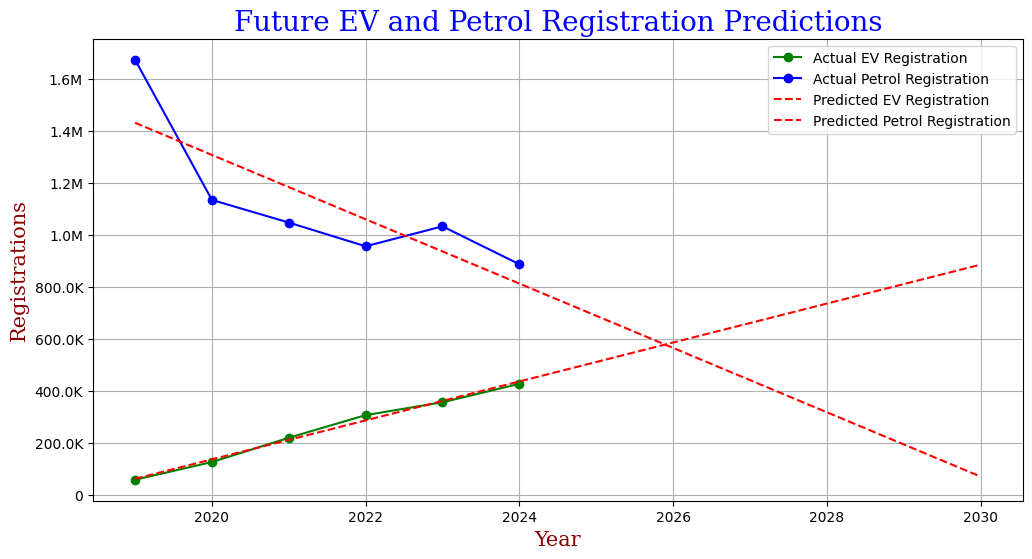

In [ ]:
future_years = pd.DataFrame({'Year': range(combined_data['Year'].min(),2031)})
future_years['Predicted_EV'] = model.predict(future_years[['Year']])
future_years['Predicted_Petrol'] = petrol_model.predict(future_years[['Year']])
plt.figure(figsize=(12,6))
plt.plot(combined_data['Year'], combined_data['Electric_Registration'], marker='o',color='green', label='Actual EV Registration')
plt.plot(combined_data['Year'], combined_data['Petrol_Registration'], marker='o', color='blue', label='Actual Petrol Registration')
plt.plot(future_years['Year'], future_years['Predicted_EV'], 'r--', label='Predicted EV Registration')
plt.plot(future_years['Year'], future_years['Predicted_Petrol'], 'r--', label='Predicted Petrol Registration')
plt.title("Future EV and Petrol Registration Predictions", fontdict=font1)
plt.xlabel("Year", fontdict=font2)
plt.ylabel("Registrations", fontdict=font2)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

**EVs Vs Charger count**

In [ ]:
X = combined_data[['Year']]
y_ev = combined_data['Electric_Registration']
ev_model = LinearRegression()
ev_model.fit(X, y_ev)
y_charger = combined_data['Charger_Count']
charger_model = LinearRegression()
charger_model.fit(X, y_charger)

LinearRegression()

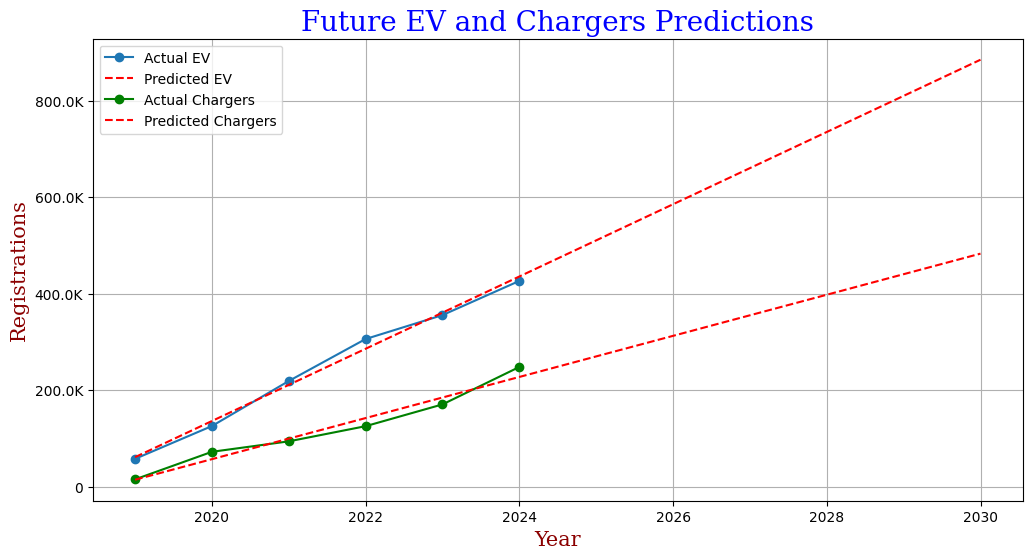

In [ ]:
future = pd.DataFrame({'Year': range(2019,2031)})
future['Predicted_EV'] = ev_model.predict(future[['Year']])
future['Predicted_Chargers'] = charger_model.predict(future[['Year']])
plt.figure(figsize=(12,6))
plt.plot(combined_data['Year'], combined_data['Electric_Registration'], marker='o', label='Actual EV')
plt.plot(future['Year'], future['Predicted_EV'], color='red', linestyle='--', label='Predicted EV')
plt.plot(combined_data['Year'], combined_data['Charger_Count'], marker='o', color='green', linestyle='-', label='Actual Chargers')
plt.plot(future['Year'], future['Predicted_Chargers'], color='red', linestyle='--', label='Predicted Chargers')
plt.title("Future EV and Chargers Predictions", fontdict=font1)
plt.xlabel("Year", fontdict=font2)
plt.ylabel("Registrations", fontdict=font2)
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()